**Soil Models**



In [1]:
import pedon as pe
import matplotlib.pyplot as plt

Pedon does not assume units for most soil types but it is good convention to use cm as the length unit. Let's create two soil models, one using the Mualem-van Genuchten equation, and one using the Brooks-Corey Equation

In [2]:
# shared properties
k_s = 100 # saturated conductivity [cm/d]
theta_r = 0.03 # residual water content[cm^3/cm^3]
theta_s = 0.42 # saturated water content[cm^3/cm^3]

In [3]:
# Mualem-van Genuchten
alpha = 0.04 # shape parameter [1/cm]
n = 1.4 # shape parameter [-]

gen = pe.Genuchten(k_s=k_s, theta_r=theta_r, theta_s=theta_s, alpha=alpha, n=n)

In [4]:
# Brooks-Corey
h_b = 10 # bubbling pressure [cm]
l = 1.1 # connectivity parameter [-]

bro = pe.Brooks(k_s=k_s, theta_r=theta_r, theta_s=theta_s, h_b=h_b, l=l)

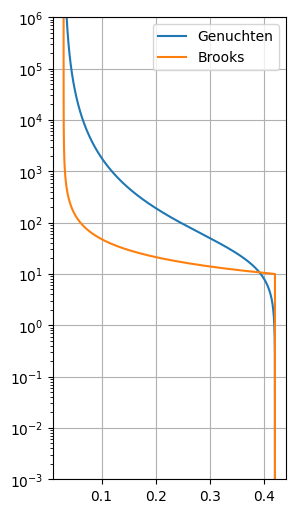

In [5]:
# Quick plot method
ax = gen.plot();
bro.plot(ax=ax)
ax.legend();

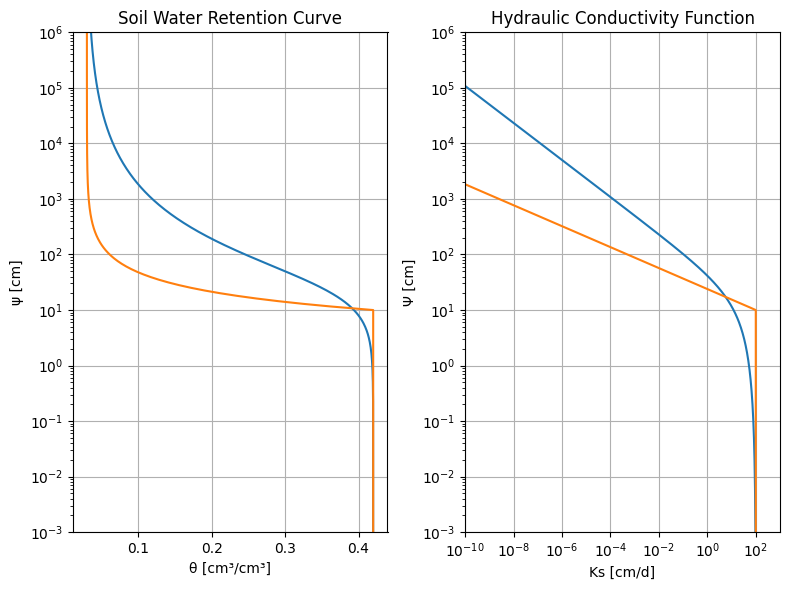

In [6]:
# More extensive plot method
f, axs = plt.subplots(1, 2, figsize=(8,6))

pe.plot_swrc(gen, ax=axs[0])
pe.plot_swrc(bro, ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_ylabel("\N{GREEK SMALL LETTER PSI} [cm]")
axs[0].set_title("Soil Water Retention Curve")
axs[0].set_xlabel("\N{GREEK SMALL LETTER THETA} [cm\N{SUPERSCRIPT THREE}/cm\N{SUPERSCRIPT THREE}]")

pe.plot_hcf(gen, ax=axs[1])
pe.plot_hcf(bro, ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_ylabel("\N{GREEK CAPITAL LETTER PSI} [cm]")
axs[1].set_title("Hydraulic Conductivity Function")
axs[1].set_xlabel("Ks [cm/d]")
axs[1].set_xscale("log")
axs[1].set_xlim(1e-10, 1e3)

f.tight_layout()